In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [6]:
! ls data

cars.csv                      kaggle-uber-other-federal.csv
happy-2015.csv                organdonation.csv
happy-2016.csv


In [7]:
df_cars = pd.read_csv('data/cars.csv')

In [8]:
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [9]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']

# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

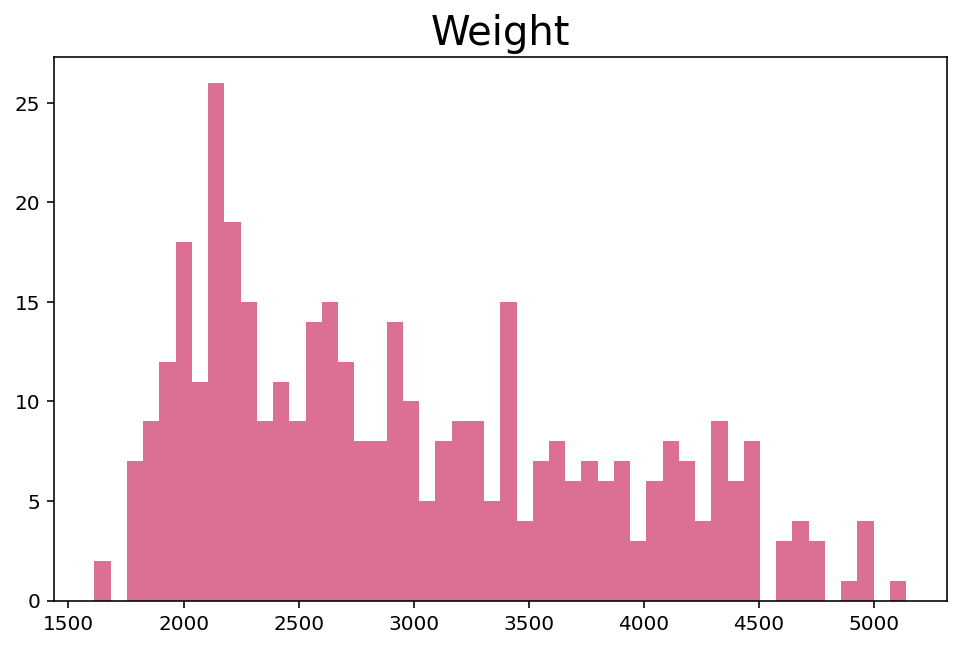

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))  
ax.hist(df_cars['WGT'], bins=50, color = 'palevioletred')
plt.title('Weight', fontsize='20')
plt.show()

In [11]:
avg_mpg

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64

In [12]:
cyl

[3, 4, 5, 6, 8]

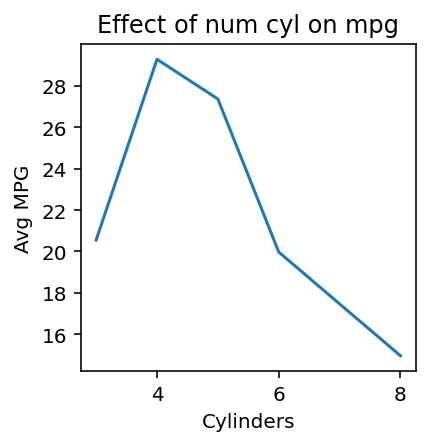

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

ax.plot(cyl, avg_mpg)
ax.set_xlabel('Cylinders')
ax.set_ylabel('Avg MPG')
ax.set_title('Effect of num cyl on mpg')
plt.show()

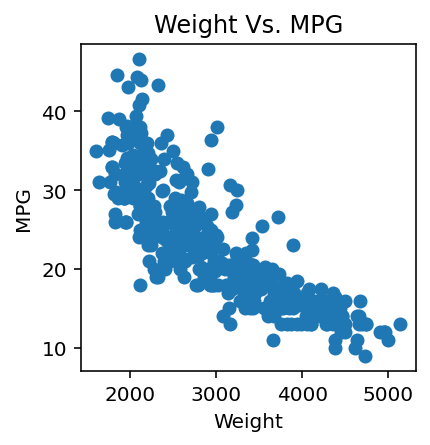

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

ax.scatter(df_cars['WGT'], df_cars['MPG'])
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
ax.set_title('Weight Vs. MPG')
plt.show()

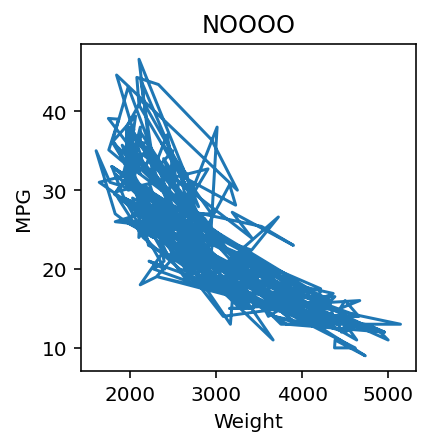

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))

ax.plot(df_cars['WGT'], df_cars['MPG'])
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
ax.set_title('NOOOO')

plt.show()

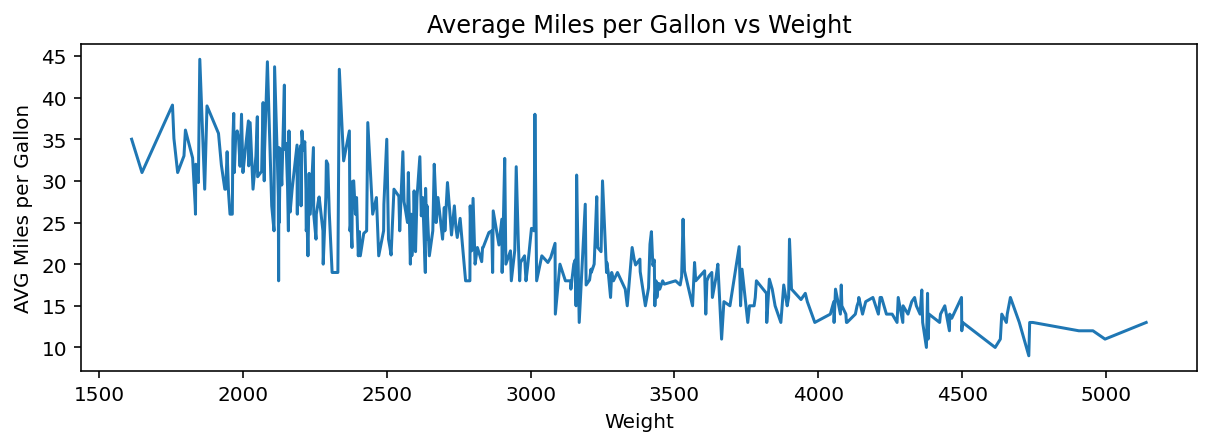

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,3))
ax.plot(avg_mpg_per_wgt)
ax.set_xlabel('Weight')
ax.set_ylabel('AVG Miles per Gallon')
ax.set_title('Average Miles per Gallon vs Weight')
plt.show()


In [17]:
avg_mpg

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64

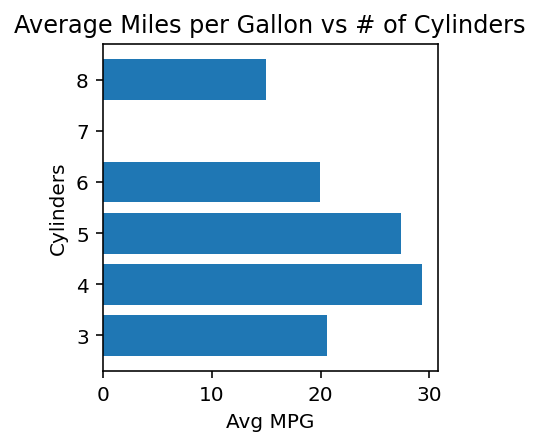

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.barh(cyl, avg_mpg)
ax.set_xlabel('Avg MPG')
ax.set_ylabel('Cylinders')
ax.set_title('Average Miles per Gallon vs # of Cylinders')
plt.show()

In [19]:
cyl4[0:10], cyl6[0:10], cyl8[0:10]

(array([24., 27., 26., 25., 24., 25., 26., 27., 28., 25.]),
 array([22., 18., 21., 21., 19., 16., 17., 19., 18., 18.]),
 array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.]))

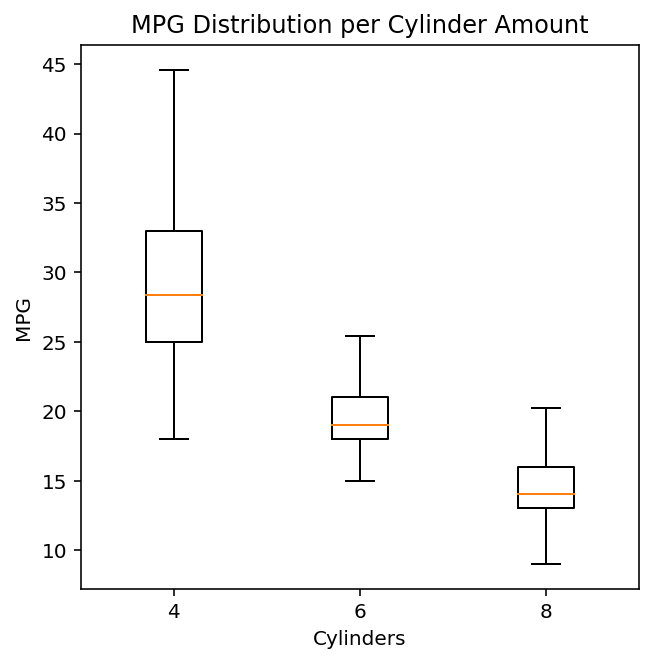

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.boxplot([cyl4, cyl6, cyl8], showfliers=False)
ax.set_xticklabels([4,6,8])
ax.set_xlabel('Cylinders')
ax.set_ylabel('MPG')
ax.set_title('MPG Distribution per Cylinder Amount')
plt.show()

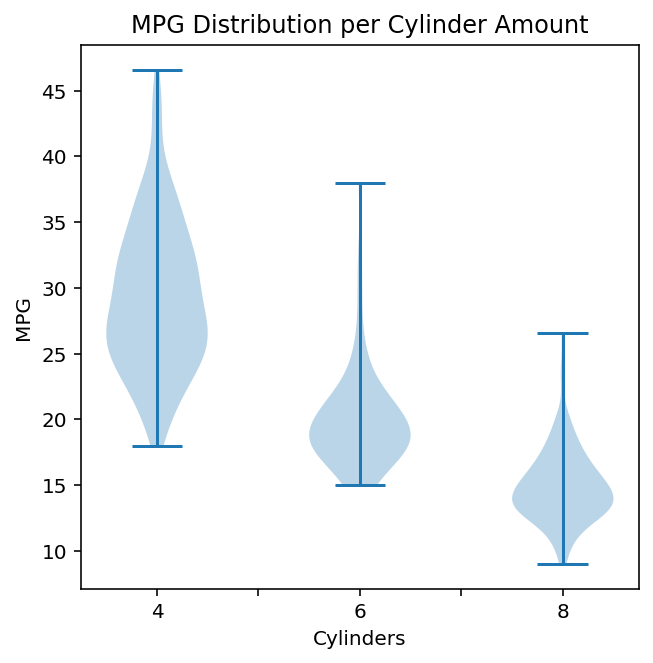

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.violinplot([cyl4, cyl6, cyl8])
ax.set_xticklabels([None,4,None,6,None,8])
ax.set_xlabel('Cylinders')
ax.set_ylabel('MPG')
ax.set_title('MPG Distribution per Cylinder Amount')
plt.show()

## Grid of Plots

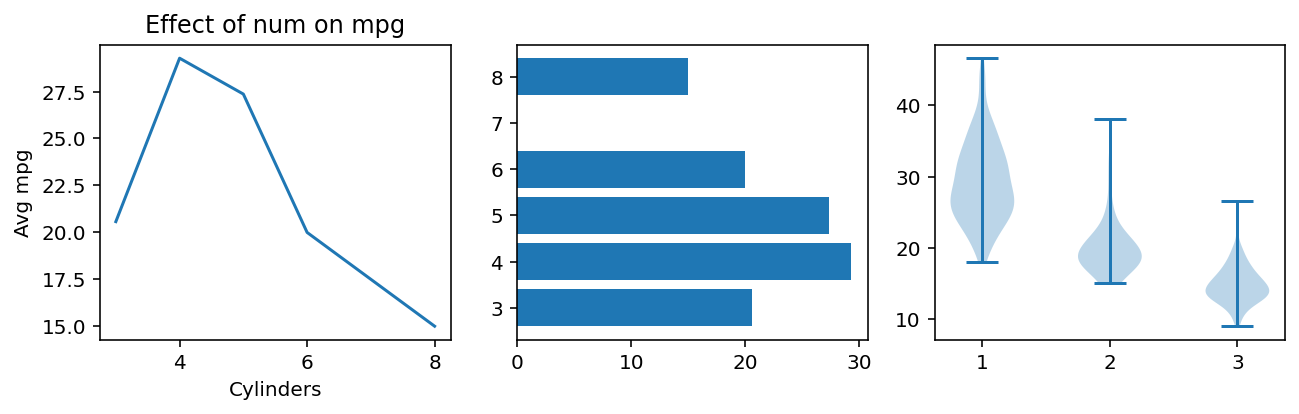

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3*3,3))
axes[0].plot(cyl, avg_mpg)
axes[0].set_xlabel('Cylinders')
axes[0].set_ylabel('Avg mpg')
axes[0].set_title('Effect of num on mpg')

axes[1].barh(cyl, avg_mpg)
axes[2].violinplot([cyl4, cyl6, cyl8])

plt.tight_layout()
plt.show()

(4,)


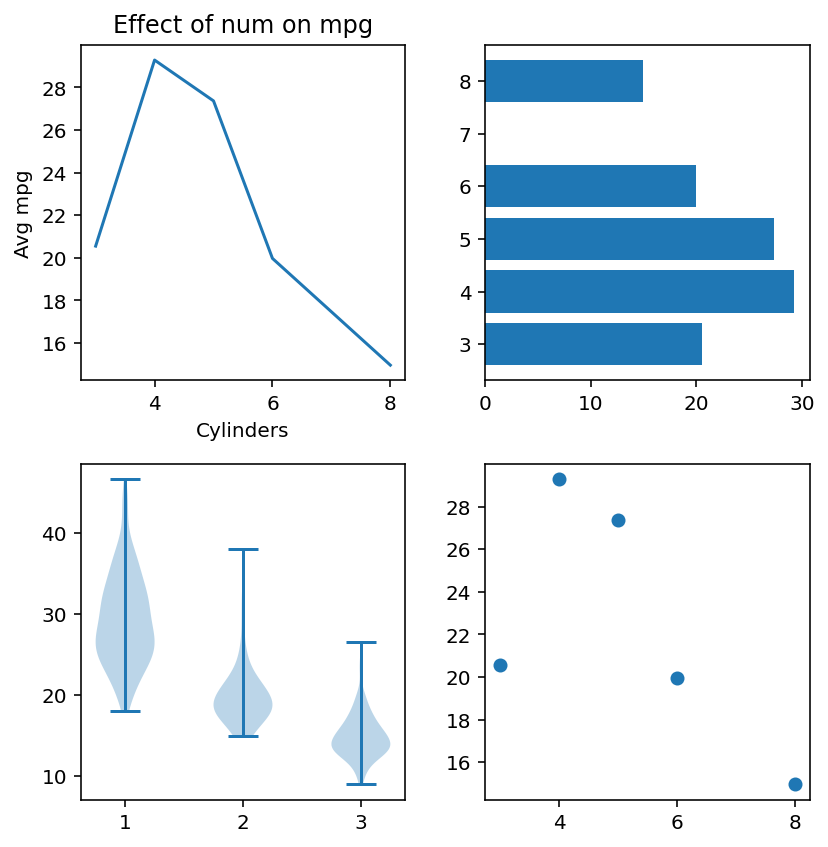

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3*2,3*2))

axes=axes.flatten()
print(axes.shape)

axes[0].plot(cyl, avg_mpg)
axes[0].set_xlabel('Cylinders')
axes[0].set_ylabel('Avg mpg')
axes[0].set_title('Effect of num on mpg')

axes[1].barh(cyl, avg_mpg)
axes[2].violinplot([cyl4, cyl6, cyl8])
axes[3].scatter(cyl, avg_mpg)

plt.tight_layout()
plt.show()

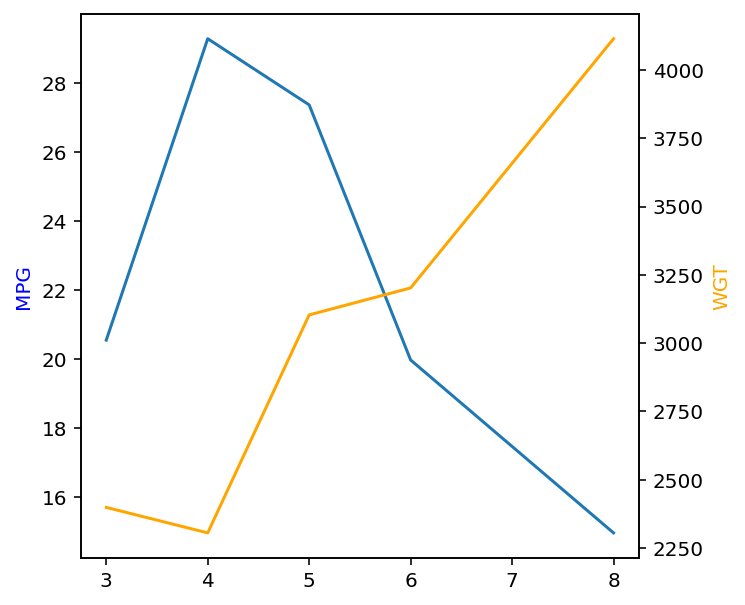

In [24]:
#TWIN PLOTS
fig, ax = plt.subplots(figsize=(5,5))

#share the x
ax_wgt = ax.twinx()

ax.plot(cyl,avg_mpg)
ax.set_ylabel('MPG', c='blue', fontsize=10)
ax_wgt.plot(cyl, avg_wgt, c='orange')
ax_wgt.set_ylabel('WGT', c='orange', fontsize=10)
plt.show()

## Images

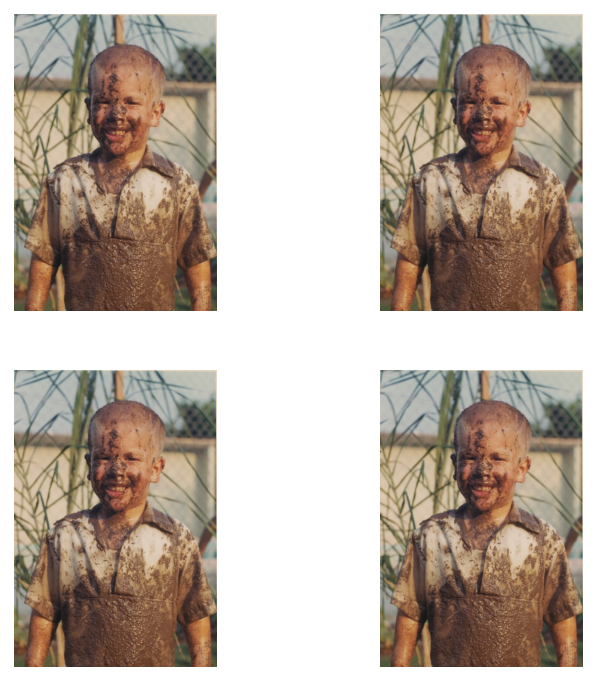

In [25]:
from PIL import Image

fig, axes = plt.subplots(2,2, figsize = (6,6))
mud = Image.open('images/mud.jpg')

for ax in axes.flatten():
    ax.imshow(mud)
    ax.axis('off')

plt.show()

In [26]:
df_digits = pd.read_csv('https://mlbook.explained.ai/data/mnist-10k-sample.csv.zip')

del df_digits['digit']
df_digits.head(2)
df_digits.shape

(10000, 784)

In [27]:
df_digits

,px0.0,px0.1,px0.2,px0.3,px0.4,px0.5,px0.6,px0.7,px0.8,px0.9,...,px27.18,px27.19,px27.20,px27.21,px27.22,px27.23,px27.24,px27.25,px27.26,px27.27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


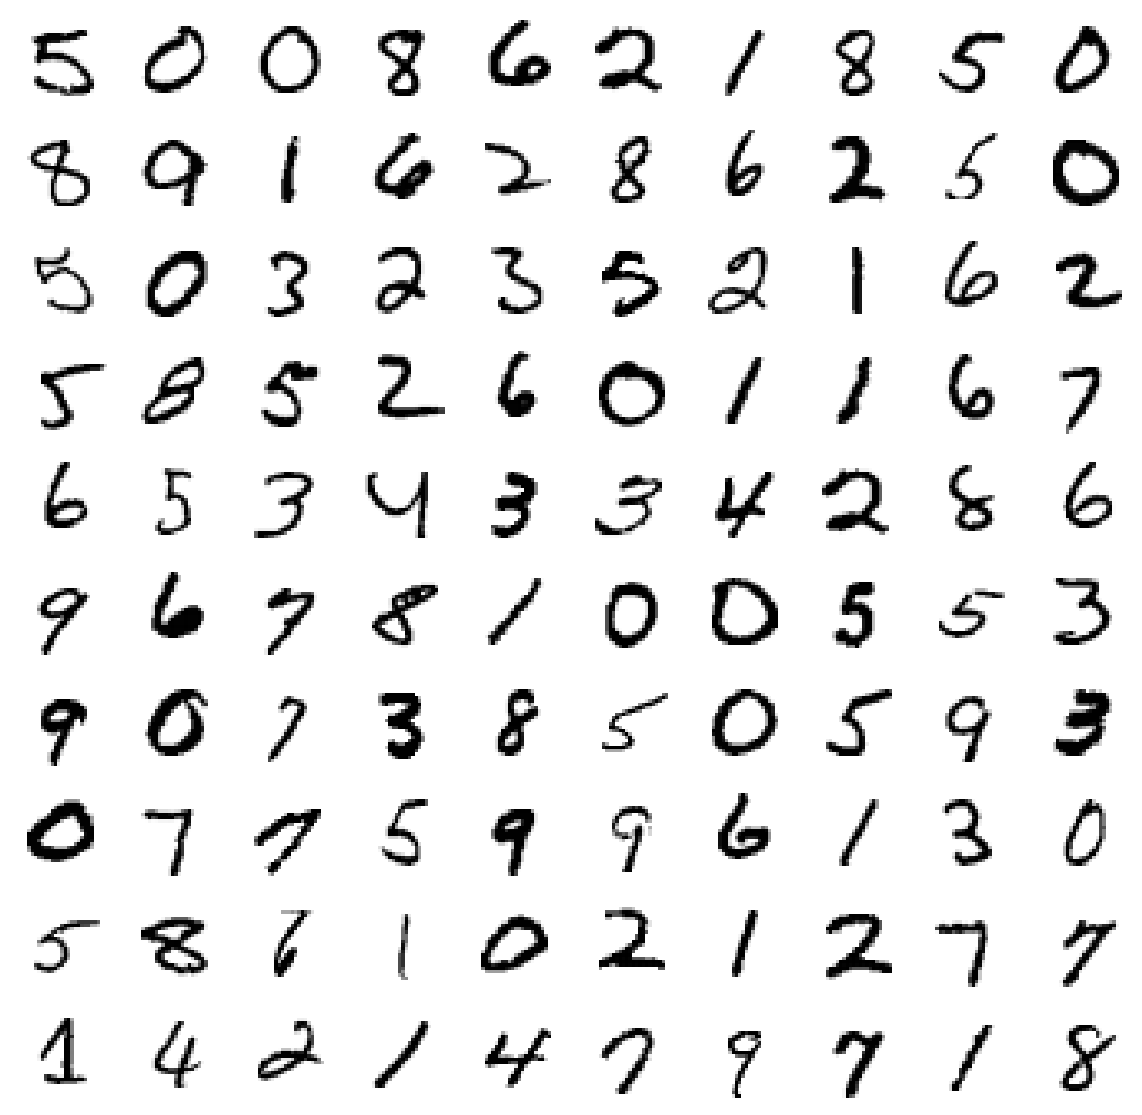

In [28]:
fig, axes = plt.subplots(10,10, figsize=(10,10))

for ax in axes.flatten():
    i = np.random.randint(0, len(df_digits))
    I = df_digits.iloc[i].values
    I = I.reshape(28,28)
    ax.imshow(I, cmap= 'binary')
    ax.axis('off')
plt.show()

In [29]:
df_cars.corr().abs() #correlations

,MPG,CYL,ENG,WGT
MPG,1.000000,0.777618,0.805127,0.832244
CYL,0.777618,1.000000,0.950823,0.897527
ENG,0.805127,0.950823,1.000000,0.932994
WGT,0.832244,0.897527,0.932994,1.000000


In [30]:
C = df_cars.corr().abs()

In [31]:
C

,MPG,CYL,ENG,WGT
MPG,1.000000,0.777618,0.805127,0.832244
CYL,0.777618,1.000000,0.950823,0.897527
ENG,0.805127,0.950823,1.000000,0.932994
WGT,0.832244,0.897527,0.932994,1.000000


## Heatmap

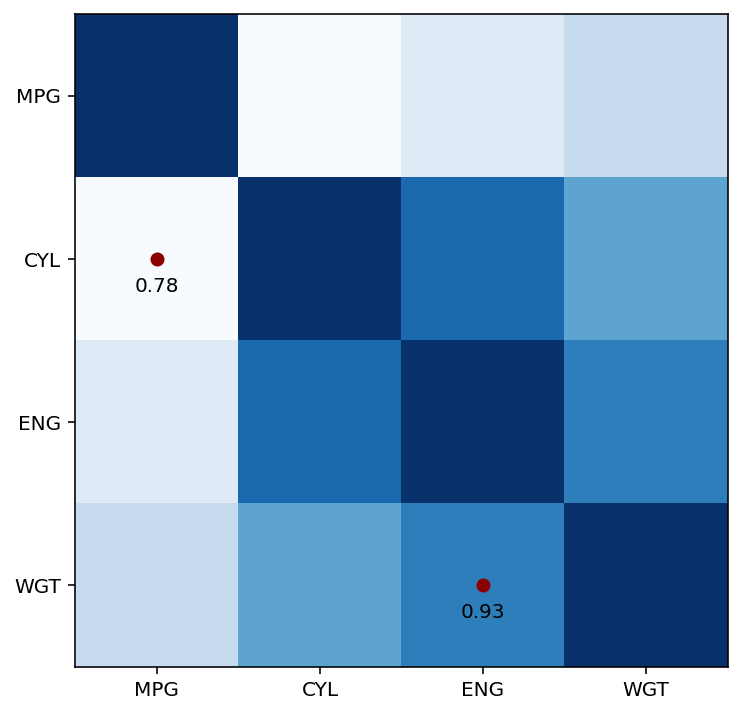

In [32]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.imshow(C, cmap='Blues')
ax.set_xticks(range(4)) #fixes alignment problems
ax.set_xticklabels(C.columns)
ax.set_yticks(range(4))
ax.set_yticklabels(C.columns)
ax.scatter([0,2],[1,3], c = 'darkred')
ax.text(0,1.2, f"{C.iloc[0,1]:.2f}", horizontalalignment='center')
ax.text(2,3.2, f"{C.iloc[2,3]:.2f}", horizontalalignment='center')

plt.savefig('heat.png', bbox_inches='tight', pad_inches=0)
#plt.show()